In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('admission_predict.csv')

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
df.describe().T

In [5]:
df = df.rename(columns={'GRE Score': 'GRE', 'TOEFL Score': 'TOEFL', 'LOR ': 'LOR', 'Chance of Admit ': 'Probability'})
df.head()

Serial No.  GRE  TOEFL  University Rating  SOP  LOR  CGPA  Research  \
0           1  337    118                  4  4.5  4.5  9.65         1   
1           2  324    107                  4  4.0  4.5  8.87         1   
2           3  316    104                  3  3.0  3.5  8.00         1   
3           4  322    110                  3  3.5  2.5  8.67         1   
4           5  314    103                  2  2.0  3.0  8.21         0   

   Probability  
0         0.92  
1         0.76  
2         0.72  
3         0.80  
4         0.65

In [ ]:
# ISSUE 1:  Return different datatypes for each columns (float, int, string, bool, etc.)
print(df.dtypes)

In [6]:
# ISSUE 2: Removing the serial no. column
df=df.drop("Serial No.",axis=1) # axis=1 means column and df.drop() helps in deleting a particular column
df.head() # used to print first 5 rows by default if no parameter given

GRE  TOEFL  University Rating  SOP  LOR  CGPA  Research  Probability
0  337    118                  4  4.5  4.5  9.65         1         0.92
1  324    107                  4  4.0  4.5  8.87         1         0.76
2  316    104                  3  3.0  3.5  8.00         1         0.72
3  322    110                  3  3.5  2.5  8.67         1         0.80
4  314    103                  2  2.0  3.0  8.21         0         0.65

In [ ]:
# ISSUE 3: Create a box plot to visualize the distribution of University Rating against Chance of Admit.
df.boxplot(column='Probability', by='University Rating', figsize=(7,5))
plt.ylabel('Probabilty')

In [ ]:
# ISSUE 4 : Use seaborn.pairplot() to visualize relationships between numerical features like GRE Score, TOEFL Score, CGPA, and Chance of Admit.
import matplotlib.pyplot as plt
import seaborn as sns

columns = ["GRE", "TOEFL", "CGPA", "Probability"]  # Selecting relevant columns
graph = sns.pairplot(df[columns], markers="D", height=2)  # Create pairplot
plt.show()


In [7]:
# ISSUE 5: Identify and impute missing values in the dataset using mean, median, or mode. Missing value columns include GRE Score, TOEFL Score, or CGPA (if present).

#observation: no null values

#imputing gre score:
df.fillna({'GRE':df['GRE'].mean()}, inplace=True)

#imputing toefl score:
df.fillna({'TOEFL':df['TOEFL'].median()}, inplace=True)

#imputing cgpa:
df.fillna({'CGPA':df['CGPA'].median()}, inplace=True)

In [ ]:
# ISSUE 6 : Normalize numerical features (GRE Score, TOEFL Score, CGPA) using MinMaxScaler to improve consistency and model performance.

In [8]:
# Splitting the dataset in features and label
X = df.drop('Probability', axis='columns')
y = df['Probability']

In [ ]:
df.head()

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
# Splitting the dataset into train and test samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
print(len(X_train), len(X_test))

400 100


In [13]:
# Creating Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.821478736588966

In [ ]:
# ISSUE 7:Apply Decision Tree Model

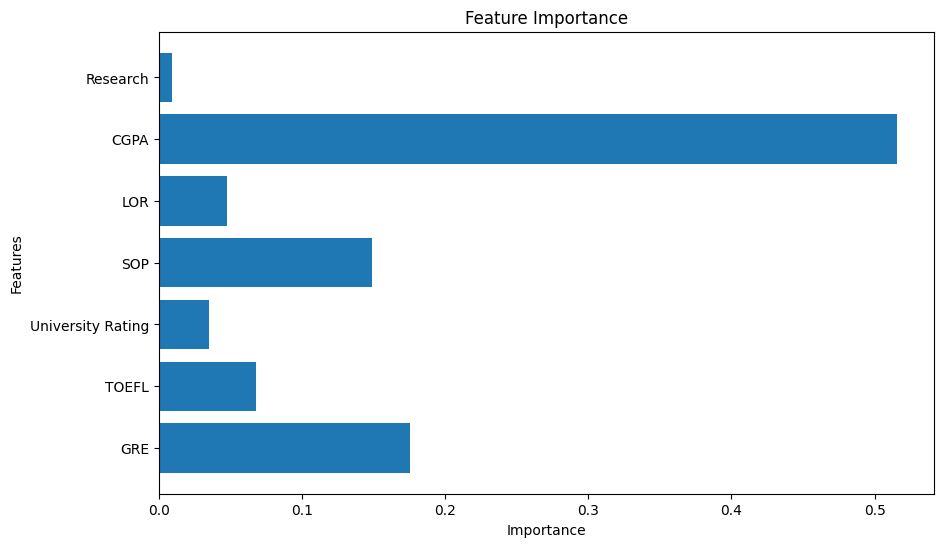

In [21]:
# ISSUE 8: Use the feature_importances_ attribute of the DecisionTreeClassifier to find the most important features. Visualize the importance using a bar chart.
from sklearn.tree import DecisionTreeClassifier
X = df.drop('Probability', axis='columns')
Y = df['Probability']
Y= (Y > 0.5).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
features = model.feature_importances_
plt.figure(figsize=(10,6))
plt.barh(X.columns, features)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [ ]:
 #ISSUE 9: Train RandomForestClassifier and compare its accuracy with the DecisionTreeClassifier.

In [ ]:
# ISSUE 10: Add a scatter plot comparing predictions with actual values.